# Environment Setup / Package Installation
Details of dependencies included

Please note: due to the reinstallation of packages used when starting the Colab instance, you will need to restart the session after running this section.

In [ ]:
!pip install -U scikit-learn==0.24.1

     |████████████████████████████████| 22.3MB 1.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
!pip install -U statsmodels==0.11.0

     |████████████████████████████████| 8.7MB 3.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install -U pygam==0.8.0

     |████████████████████████████████| 1.8MB 6.0MB/s 


In [ ]:
!pip install pgmpy

     |████████████████████████████████| 337kB 4.5MB/s 


# Load Packages and Prepare Data
Sticking with (raw + binarized) diabetes dataset, and will add regression dataset after that.

Generic libraries will be loaded here, and overarching utilities will be defined in this section. Classes for individual implementations will be loaded as needed.

## Data Loading and Preprocessing 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv
Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import statsmodels.api as sm



## Classification Data

In [ ]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
# changing the missing values based on means for each class
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['Insulin'].isnull()), 'Insulin'] = 102.5
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['Insulin'].isnull()), 'Insulin'] = 169.5

diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['Glucose'].isnull()), 'Glucose'] = 107
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['Glucose'].isnull()), 'Glucose'] = 140

diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['SkinThickness'].isnull()), 'SkinThickness'] = 27
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['SkinThickness'].isnull()), 'SkinThickness'] = 32

diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['BloodPressure'].isnull()), 'BloodPressure'] = 70
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['BMI'].isnull()), 'BMI'] = 30.1
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['BMI'].isnull()), 'BMI'] = 34.3

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(diabetes_df, random_state=0, test_size=0.2)

train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [ ]:
X_train = train.drop(columns=['Outcome'])
y_train = train['Outcome']

X_test = test.drop(columns=['Outcome'])
y_test = test['Outcome']

classes=['non-diabetic', 'diabetic']

## Regression Data

In [ ]:
claims_data = pd.read_csv('insurance.csv')
claims_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
# One hot encoding for region
claims_data = pd.concat((claims_data,pd.get_dummies(claims_data.region, prefix='region')),1)
# One hot encoding for sex
claims_data = pd.concat((claims_data,pd.get_dummies(claims_data.sex, prefix='sex')),1)
# One hot encoding for smoker
claims_data = pd.concat((claims_data,pd.get_dummies(claims_data.smoker, prefix='smoker')),1)
# drop the columns 
claims_data.drop(['region', 'sex','smoker'], axis=1,inplace = True)
claims_data.head(10)

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,0,0,0,1,1,0,0,1
1,18,33.770,1,1725.55230,0,0,1,0,0,1,1,0
2,28,33.000,3,4449.46200,0,0,1,0,0,1,1,0
3,33,22.705,0,21984.47061,0,1,0,0,0,1,1,0
4,32,28.880,0,3866.85520,0,1,0,0,0,1,1,0
5,31,25.740,0,3756.62160,0,0,1,0,1,0,1,0
6,46,33.440,1,8240.58960,0,0,1,0,1,0,1,0
7,37,27.740,3,7281.50560,0,1,0,0,1,0,1,0
8,37,29.830,2,6406.41070,1,0,0,0,0,1,1,0
9,60,25.840,0,28923.13692,0,1,0,0,1,0,1,0


In [ ]:
X_reg = claims_data[['age', 'bmi', 'children','region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',
       'sex_female', 'sex_male', 'smoker_no', 'smoker_yes']]

y_reg = claims_data[['charges']]

In [ ]:
from sklearn.model_selection import train_test_split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = \
train_test_split(X_reg, y_reg, test_size=0.2,random_state = 0)

# Linear Regression

In [ ]:
from statsmodels.regression import linear_model
sm_ols = linear_model.OLS(y_reg_train, X_reg_train) 
sm_model = sm_ols.fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     371.7
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          1.85e-301
Time:                        21:23:04   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1061   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                253.7005     13.530     18.751      0.000     227.152     280.249
bmi                335.9628     32.228     10.424      0.000     272.724     399.201
children           436.9101    156.584      2.790      0.005     129.661     744.159
region_northeast   380.4127    384.691      0.989      0.323    -374.430    1135.255
region_northwest   120.2800    376.809      0.319      0.750    -619.096     859.656
region_southeast  -532.8661    436.403     -1.221      0.222   -1389.177     323.445
region_southwest  -381.5360    391.071     -0.976      0.329   -1148.897     385.825
sex_female        -199.1229    471.328     -0.422      0.673   -1123.964     725.718
sex_male          -214.5866    477.395     -0.449      0.653   -1151.332     722.159
smoker_no        -1.201e+04    478.235    -25.112      0.000   -1.29e+04   -1.11e+04
smoker_yes         1.16e+04    510.457     22.716      0.000    1.06e+04    1.26e+04
==============================================================================
Omnibus:                      256.825   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.044
Skew:                           1.279   Prob(JB):                    2.29e-135
Kurtosis:                       5.715   Cond. No.                     4.39e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Linear Regression Visualizations

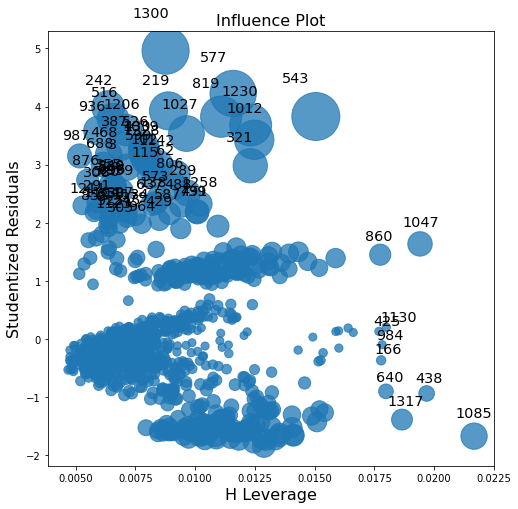

In [ ]:
fig = sm.graphics.influence_plot(sm_model, criterion="cooks")
fig.set_figheight(8)
fig.set_figwidth(8)

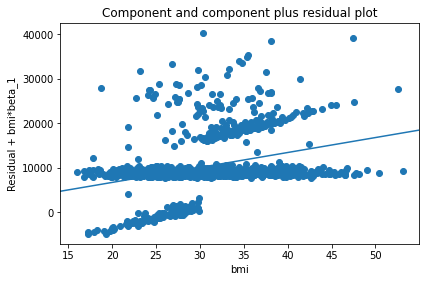

In [ ]:
fig = sm.graphics.plot_ccpr(sm_model, "bmi")
fig.tight_layout(pad=1.0)

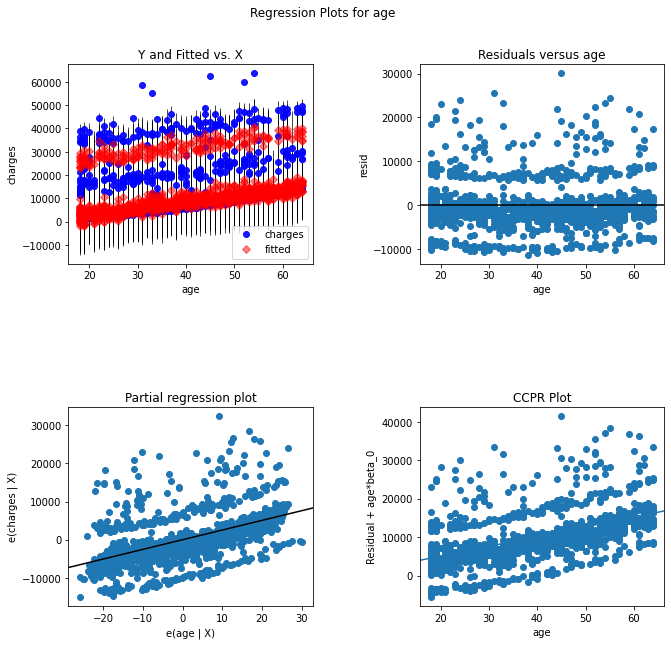

In [ ]:
fig = sm.graphics.plot_regress_exog(sm_model, "age")
fig.set_figheight(10)
fig.set_figwidth(10)

# Linear Regression with Lasso

In [ ]:
# lasso regularization
lasso_regression = linear_model.OLS(y_reg_train, X_reg_train)
lasso_regression_results = lasso_regression.fit_regularized(method ='sqrt_lasso',alpha=0.01)
lasso_regression_results.params

age                   253.703124
bmi                   335.959210
children              436.864077
region_northeast      499.032618
region_northwest      238.908020
region_southeast     -413.858192
region_southwest     -262.439520
sex_female              7.980375
sex_male               -7.380998
smoker_no          -12335.458004
smoker_yes          11270.256875
dtype: float64

# Linear Regression with Ridge

In [ ]:
# ridge regularization
ridge_regression = linear_model.OLS(y_reg_train, X_reg_train)
ridge_regression_results = ridge_regression.fit_regularized(L1_wt=0,alpha=0.01)
ridge_regression_results.params

array([   252.17078532,    330.30065428,    439.24096989,    366.6702416 ,
           98.59444392,   -464.24662764,   -395.66740837,   -203.56372408,
         -191.0856264 , -11645.20558779,  11250.55623731])

# Linear Regression with ElasticNet

In [ ]:
elastic_net = linear_model.OLS(y_reg_train, X_reg_train)
elastic_net_results = elastic_net.fit_regularized(method='elastic_net', alpha=0.01, L1_wt=1.0)
elastic_net_results.params

age                   256.533805
bmi                   303.748058
children              411.711083
region_northeast    -6145.233650
region_northwest    -6410.038227
region_southeast    -6917.322545
region_southwest    -6862.167293
sex_female             -1.020205
sex_male               -2.644077
smoker_no           -4829.027062
smoker_yes          18764.067716
dtype: float64

# Linear Regression with Reduced Features

In [ ]:
X_reg_train_reduced = X_reg_train[['age', 'bmi', 'children', 'smoker_yes']]
X_reg_test_reduced = X_reg_test[['age', 'bmi', 'children', 'smoker_yes']]
X_reg_train_reduced_with_constant= sm.add_constant(X_reg_train_reduced)
sm_ols_reduced = linear_model.OLS(y_reg_train, X_reg_train_reduced_with_constant) 
sm_model_reduced = sm_ols_reduced.fit()
sm_model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     742.8
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          3.00e-306
Time:                        21:05:16   Log-Likelihood:                -10853.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1065   BIC:                         2.174e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.191e+04   1059.711    -11.239      0.000    -1.4e+04   -9831.179
age          254.9715     13.506     18.878      0.000     228.470     281.473
bmi          320.6190     30.679     10.451      0.000     260.422     380.816
children     430.5457    156.103      2.758      0.006     124.242     736.849
smoker_yes  2.359e+04    467.981     50.403      0.000    2.27e+04    2.45e+04
==============================================================================
Omnibus:                      257.442   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.986
Skew:                           1.282   Prob(JB):                    1.43e-135
Kurtosis:                       5.712   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Generalized Linear Model (GLM)

In [ ]:
# glm model with poisson
glm = sm.GLM(y_reg_train, X_reg_train_reduced,
             family=sm.families.Poisson(link=sm.families.links.log))
glm_results = glm.fit()
glm_results.summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                charges   No. Observations:                 1070
Model:                            GLM   Df Residuals:                     1066
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.9854e+06
Date:                Wed, 14 Apr 2021   Deviance:                   1.9959e+07
Time:                        21:19:07   Pearson chi2:                 6.00e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0686   1.96e-05   3508.265      0.000       0.069       0.069
bmi            0.1556   2.85e-05   5450.871      0.000       0.156       0.156
children       0.1764      0.000    776.267      0.000       0.176       0.177
smoker_yes     1.8564      0.001   3264.944      0.000       1.855       1.858
==============================================================================
"""

# Genearlized Additive Model (GAM)

In [ ]:
from pygam import LinearGAM,s,l

gam = LinearGAM(lam=0,n_splines=10)  
#gam = LinearGAM(l(0) + l(1) + l(2) + l(3)) 
gam.fit(X_reg_train.values, y_reg_train)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                        29.0
Link Function:                     IdentityLink Log Likelihood:                                -19629.2742
Number of Samples:                         1070 AIC:                                            39318.5484
                                                AICc:                                           39320.3386
                                                GCV:                                         38882924.9935
                                                Scale:                                       36990717.0651
                                                Pseudo R-Squared:                                    0.749
Feature Function                  Lam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  


<Figure size 432x288 with 0 Axes>

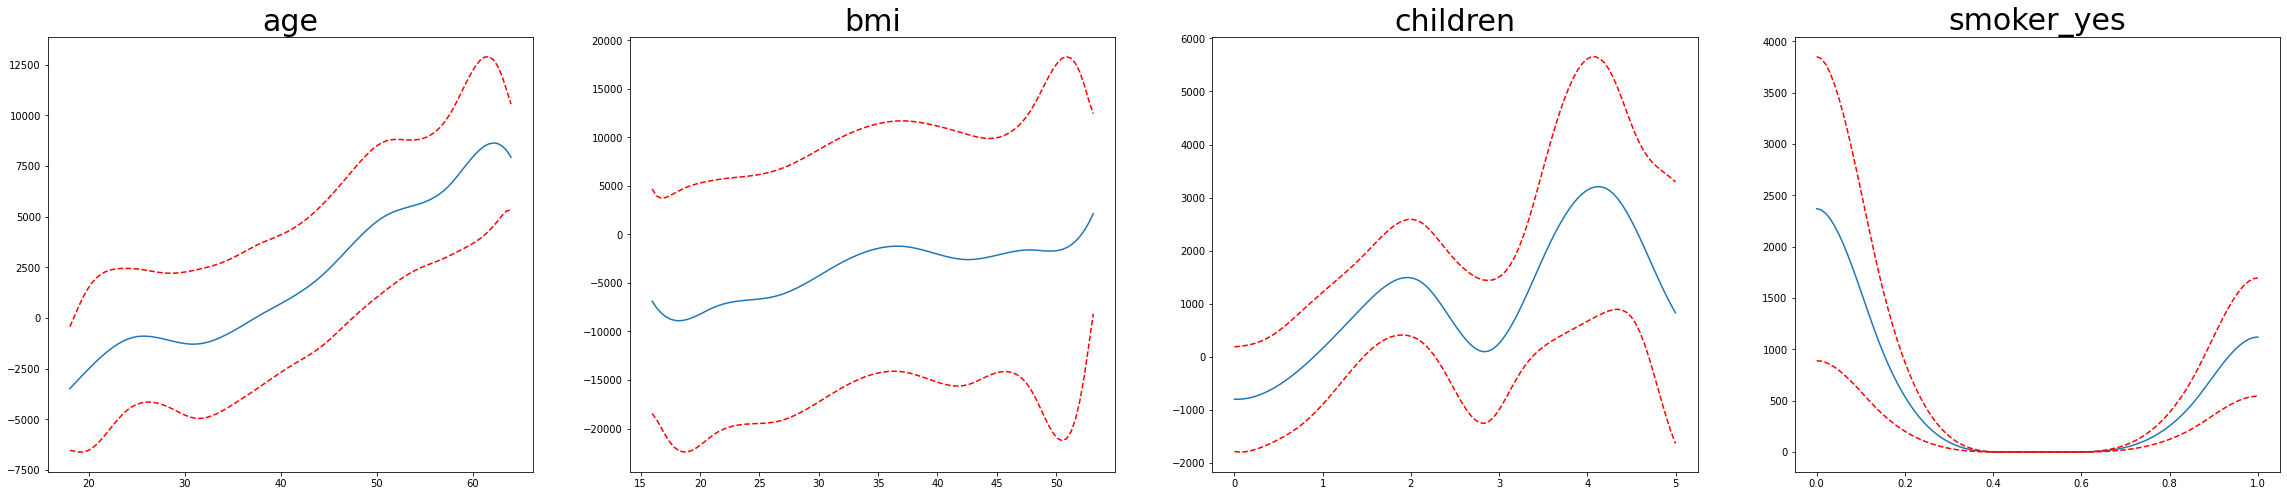

In [ ]:
import matplotlib.pyplot as plt
plt.figure();
fig, axs = plt.subplots(1,4,figsize=(40, 8));


titles = ['age', 'bmi', 'children', 'smoker_yes']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i], size=30);

# Logistic Regression

In [ ]:
# building the model and fitting the data 
X_train_withconst = sm.add_constant(X_train)
log_reg = sm.Logit(y_train, X_train_withconst).fit() 
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.465382
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Wed, 14 Apr 2021   Pseudo R-squ.:                  0.2877
Time:                        22:09:19   Log-Likelihood:                -285.74
converged:                       True   LL-Null:                       -401.18
Covariance Type:            nonrobust   LLR p-value:                 1.946e-45
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.7245      0.891     -9.789      0.000     -10.471      -6.978
Pregnancies                  0.0891      0.034      2.597      0.009       0.022       0.156
Glucose                      0.0311      0.004      7.173      0.000       0.023       0.040
BloodPressure               -0.0098      0.010     -1.003      0.316      -0.029       0.009
SkinThickness                0.0284      0.015      1.875      0.061      -0.001       0.058
Insulin                      0.0044      0.002      2.829      0.005       0.001       0.007
BMI                          0.0646      0.020      3.276      0.001       0.026       0.103
DiabetesPedigreeFunction     0.7444      0.334      2.231      0.026       0.090       1.398
Age                          0.0177      0.010      1.694      0.090      -0.003       0.038
============================================================================================
"""

# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
print('Class priors for nondiabetes and diabetes are:',gnb.class_prior_)
variances = gnb.sigma_
means = gnb.theta_
results = pd.DataFrame(list(zip(variances[1],means[1], means[0],variances[0])),columns={"Non-Diabetic Means","Diabetic Means", "Non-Diabetic Variances", "Diabetic Variances"}) 
results.insert(0, "Feature", X_train.columns.values, True)
results.head(8)

Class priors for nondiabetes and diabetes are: [0.64006515 0.35993485]


,Feature,Non-Diabetic Variances,Non-Diabetic Means,Diabetic Variances,Diabetic Means
0,Pregnancies,14.922021,4.764706,3.374046,9.409716
1,Glucose,854.767314,141.628959,110.493639,601.766507
2,BloodPressure,152.052198,75.110860,71.231552,134.529089
3,SkinThickness,78.039647,32.357466,27.394402,71.994583
4,Insulin,8746.455363,186.805430,119.050891,6410.156452
5,BMI,44.746775,35.566063,30.940967,43.563088
6,DiabetesPedigreeFunction,0.141134,0.538986,0.425692,0.089203
7,Age,123.166815,37.420814,31.442748,143.091514


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=3,random_state=0)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

## Visualize Decision Tree

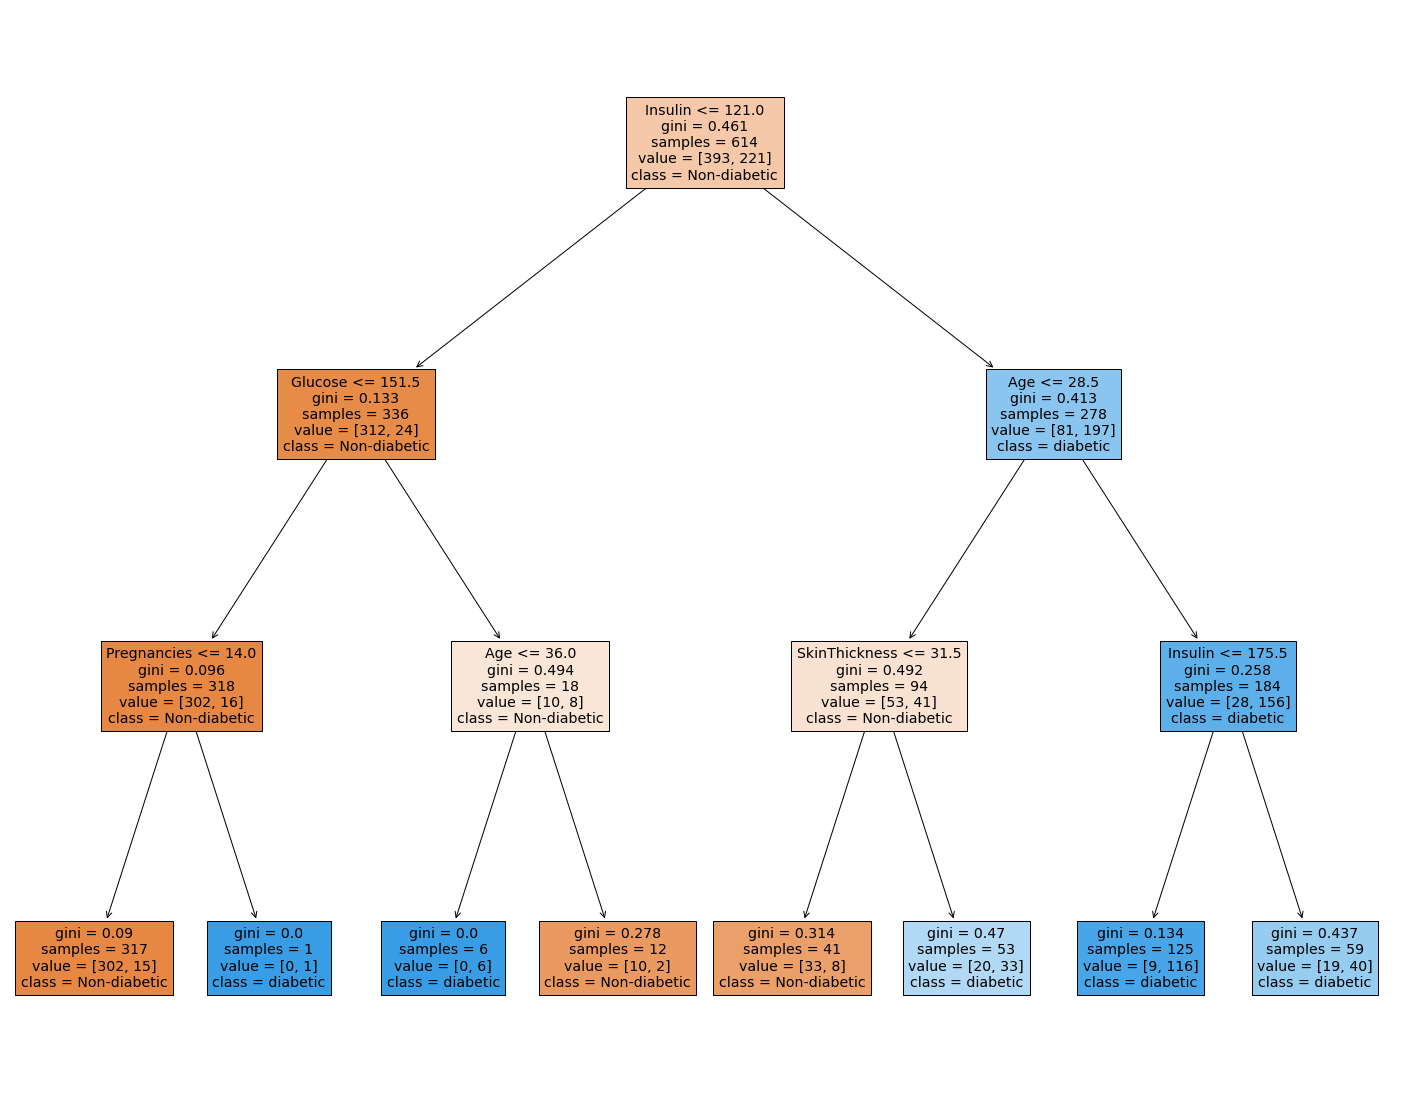

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_  = tree.plot_tree(decision_tree, 
                   feature_names=X_train.columns.values,  
                   class_names=['Non-diabetic','diabetic'],
                   filled=True)

# Bayesian Network

Here I'll try to learn the factors for a specified structure using the Bayesian estimator (pgmpy has options for Bayesian and MLE). The alternative is to learn the structure along with the values, but using a manually specified structure aids interpretability.

However, we can only do this type of modeling on discretized data, so we'll need to account for that by binning the data. We'll use a discretizer from scikit-learn to learn the cut points on training data, and we'll apply the transformations to evaluation data later.

## Discretize Data

In [ ]:
N_BINS = 5
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=N_BINS, encode='ordinal')


In [ ]:
features_to_use = [
    'BMI', 'Glucose', 'Age', 'Insulin', 
    'BloodPressure', 'SkinThickness', 
    'Pregnancies', 'DiabetesPedigreeFunction'
]

In [ ]:

train_disc = pd.DataFrame(discretizer.fit_transform(X_train),
                          columns=X_train.columns)
train_disc['Outcome'] = y_train

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


In [ ]:
train_disc.nunique()

Pregnancies                 5
Glucose                     5
BloodPressure               5
SkinThickness               5
Insulin                     4
BMI                         5
DiabetesPedigreeFunction    5
Age                         5
Outcome                     2
dtype: int64

## Fit the Model
We can now learn the CPDs for this problem's Bayesian Network. We start by defining the network structure using the column names.

In [ ]:
diabetes_edges = [
    ('Pregnancies', 'Outcome'),
    ('Age', 'Outcome'),
    ('DiabetesPedigreeFunction', 'Outcome'),
    ('BMI', 'Outcome'),
    ('BMI', 'SkinThickness'),
    ('BMI', 'BloodPressure'),
    ('Outcome', 'Glucose'),
    ('Outcome', 'Insulin'),
    ('Outcome', 'BloodPressure')
]

The pgmpy library has several options for estimating parameters in a Bayes Net. Here, we use a BayesianEstimator with BDeu (Bayesian Dirichlet equivalent uniform) prior, but other options exist (Dirichlet prior, MaximumLikelihoodEstimator)

In [ ]:
%%time
from pgmpy.sampling import BayesianModelSampling
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator

model = BayesianModel(diabetes_edges)
model.fit(data=train_disc, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=1000)

CPU times: user 875 ms, sys: 212 ms, total: 1.09 s
Wall time: 2.8 s


## Visualize Bayesian Network

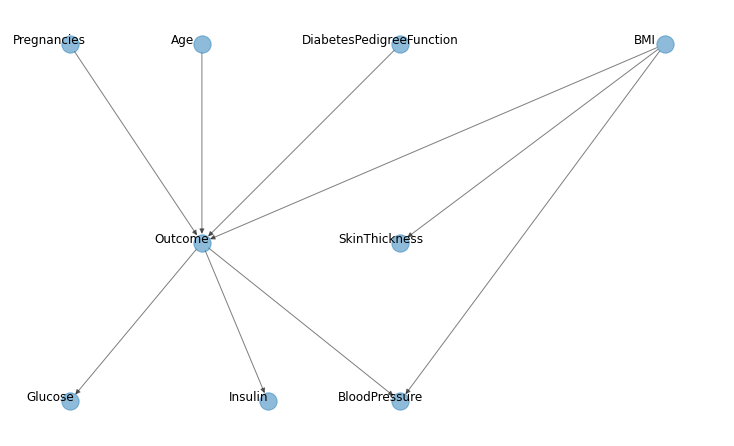

In [ ]:
import networkx as nx
positions = {
    'Pregnancies':[0.1, 1],
    'Age':[0.3, 1], 
    'DiabetesPedigreeFunction':[0.6, 1],
    'BMI':[1.0, 1],
    'Outcome':[0.3, 0.5],
    'SkinThickness':[0.6, 0.5],
    'Glucose':[0.1, 0.1],
    'Insulin':[0.4, 0.1],
    'BloodPressure':[0.6, 0.1]
}


plt.figure(figsize=(10, 6))
nx.draw(model, with_labels=False, pos=positions, alpha=0.5)

offsets = (-0.03, 0.01)
pos_labels = {}
for key in positions.keys():
    x, y = positions[key]
    pos_labels[key] = (x + offsets[0], y+offsets[1])

nx.draw_networkx_labels(model, pos=pos_labels)
plt.show()